This my first personal project
Disclaimer: These numbers are valid as of August 2023

## **Uploading and reading the file**

In [2]:
#Uploading the csv file from local drive
from google.colab import files
uploaded = files.upload()

Saving taylor_swift_spotify.csv to taylor_swift_spotify.csv


In [4]:
# Import portion of a package
import matplotlib.pyplot as plt  # Visualization package

# Import full packages under custom name
import numpy as np  # Common package for numerical methods
import pandas as pd  # Common package for data storeage/manipulation
import seaborn as sns  # Common package for statistical visualizations

# Import portion of a package
import scipy.stats as stats
from sklearn.impute import SimpleImputer as Imputer  # Specific function from common machine learning package

In [5]:
#reading the csv file
import io
df = pd.read_csv(io.BytesIO(uploaded['taylor_swift_spotify.csv']))
# Dataset is now stored in a Pandas Dataframe

# **Displaying the first 5 rows**

In [6]:
df.head()  # A method that prints the first 5 rows (by default) of a df

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Mine (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,1,7G0gBu6nLdhFDPRLc0HdDG,spotify:track:7G0gBu6nLdhFDPRLc0HdDG,0.00444,0.646,0.783,0.000001,0.171,-2.846,0.0356,121.080,0.490,87,231706
1,1,Sparks Fly (Taylor’s Version),Speak Now (Taylor's Version),2023-07-07,2,3MytWN8L7shNYzGl4tAKRp,spotify:track:3MytWN8L7shNYzGl4tAKRp,0.02510,0.588,0.758,0.000000,0.131,-2.347,0.0305,114.991,0.387,84,261230
2,2,Back To December (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,3,79uDOz0zuuWS7HWxzMmTa2,spotify:track:79uDOz0zuuWS7HWxzMmTa2,0.00621,0.497,0.635,0.000000,0.117,-3.927,0.0273,142.063,0.203,88,294189
3,3,Speak Now (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,4,5xXqyjLicvEpch72qEryFT,spotify:track:5xXqyjLicvEpch72qEryFT,0.24800,0.727,0.677,0.000000,0.143,-2.871,0.0325,118.995,0.639,84,242473
4,4,Dear John (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,5,1zU8j1x3yi9xalMF96pzKp,spotify:track:1zU8j1x3yi9xalMF96pzKp,0.02360,0.419,0.470,0.000000,0.163,-5.016,0.0296,119.294,0.133,84,405906


# **Dimension of the data frame**

In [7]:
print("The dimension of the dataframe is",df.shape)

The dimension of the dataframe is (487, 18)


## **Checking for null values**

In [8]:
#count the number of missing values

print(df.isnull().values.sum())

0


There is no missing values thus there is no need to adjust the data

# **Data types of each column**

In [9]:
df.dtypes #getting the name of each column and its type

Unnamed: 0            int64
name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

# **Organizing categorical and numerical features**

In [10]:
# List of column headings
df_columns = ["Unnamed","name","album","release_date","track_number","id","uri","acousticness","danceability","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence","popularity","duration_ms"]

df.columns = df_columns  # Set column headings
# (a) Make a list of column names in desired order
columns_sorted = df_columns[:1] + df_columns[4:5] + df_columns[7:] + df_columns[1:4] + df_columns[5:7]
# (b) Reorder the columns in the df DataFrame
df = df[columns_sorted]
# Print the resulting DataFrame
df.head()

,Unnamed,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,name,album,release_date,id,uri
0,0,1,0.00444,0.646,0.783,0.000001,0.171,-2.846,0.0356,121.080,0.490,87,231706,Mine (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,7G0gBu6nLdhFDPRLc0HdDG,spotify:track:7G0gBu6nLdhFDPRLc0HdDG
1,1,2,0.02510,0.588,0.758,0.000000,0.131,-2.347,0.0305,114.991,0.387,84,261230,Sparks Fly (Taylor’s Version),Speak Now (Taylor's Version),2023-07-07,3MytWN8L7shNYzGl4tAKRp,spotify:track:3MytWN8L7shNYzGl4tAKRp
2,2,3,0.00621,0.497,0.635,0.000000,0.117,-3.927,0.0273,142.063,0.203,88,294189,Back To December (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,79uDOz0zuuWS7HWxzMmTa2,spotify:track:79uDOz0zuuWS7HWxzMmTa2
3,3,4,0.24800,0.727,0.677,0.000000,0.143,-2.871,0.0325,118.995,0.639,84,242473,Speak Now (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,5xXqyjLicvEpch72qEryFT,spotify:track:5xXqyjLicvEpch72qEryFT
4,4,5,0.02360,0.419,0.470,0.000000,0.163,-5.016,0.0296,119.294,0.133,84,405906,Dear John (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,1zU8j1x3yi9xalMF96pzKp,spotify:track:1zU8j1x3yi9xalMF96pzKp


Now it's clear that the numeric features are on the left hand side and the categorical on the right

# **Convert numerical data to floats**

In [11]:
# Define lists to easily reference each type of data
num_cols = columns_sorted[:13]  # List of column headings with numerical data

# Convert the numerical data to floats
df[num_cols] = df[num_cols].apply(lambda x: x.astype(float))
df.dtypes

Unnamed             float64
track_number        float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
duration_ms         float64
name                 object
album                object
release_date         object
id                   object
uri                  object
dtype: object

# **Top 5 most popular songs**

In [12]:
#Sort the table by top 5 most popular songs
top_5 = df.sort_values('popularity', ascending=False).head(5)

# Select the specific column, in this case name to display the names only
column_to_display = top_5['name']

#Reset the index numbers, it will start from 0 to 5
column_to_display.reset_index(drop=True)

#Start the index from 1 instead of 0
column_to_display.index = range(1, len(column_to_display) + 1)

#Display
column_to_display

1    Cruel Summer
2       Anti-Hero
3          august
4           Lover
5        cardigan
Name: name, dtype: object

# **Showing which albums the top 5 songs belong to using a pie chart**

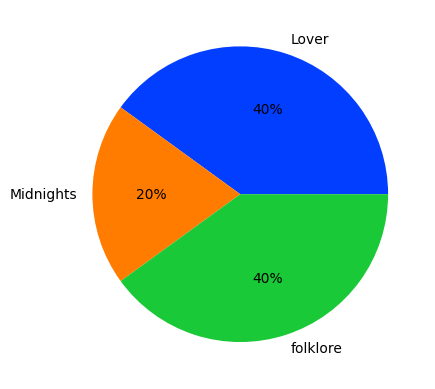

In [13]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# getting the album names
key = top_5.groupby('album').size()

# counting the number of each album that is in the top 5
result = top_5.groupby('album').size()

# turn the dataframe to a list
album_counts = result.tolist()
album_names = key.index.tolist()

# plotting data on chart
plt.pie(album_counts, labels= album_names, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

# **Bottom 5 songs and the album they belong to**

In [14]:
bottom_5 = df.sort_values('popularity', ascending=True).head(5)

# Assuming the correct column names are 'name' and 'Album' (without leading/trailing spaces)
col_to_display = bottom_5[['name', 'album']]

# Reset the index numbers and start the index from 1
col_to_display.index = range(1, len(col_to_display) + 1)

# Display
col_to_display

,name,album
1,Jump Then Fall,reputation Stadium Tour Surprise Song Playlist
2,Change,reputation Stadium Tour Surprise Song Playlist
3,Hey Stephen,reputation Stadium Tour Surprise Song Playlist
4,The Lucky One,reputation Stadium Tour Surprise Song Playlist
5,Invisible,reputation Stadium Tour Surprise Song Playlist


# **Diplaying the folklore and evermore album tracks**

In [21]:
name_album = df[['name','album']] #this only shows the cols name and album

# make a new dataframe with folklore and evermore
df_new = name_album[(name_album['album'] == 'folklore') | (name_album['album'] == 'evermore')]

df_new # display

,name,album
151,willow,evermore
152,champagne problems,evermore
153,gold rush,evermore
154,‘tis the damn season,evermore
155,tolerate it,evermore
156,"no body, no crime (feat. HAIM)",evermore
157,happiness,evermore
158,dorothea,evermore
159,coney island (feat. The National),evermore
160,ivy,evermore


# **Danceability vs Popularity**

In this part I'm going to show the relation between danceability vs Popularity to see if danceability has any effect on the Popularity of a song

Correlation between danceability and popularity: 0.056533874366506524


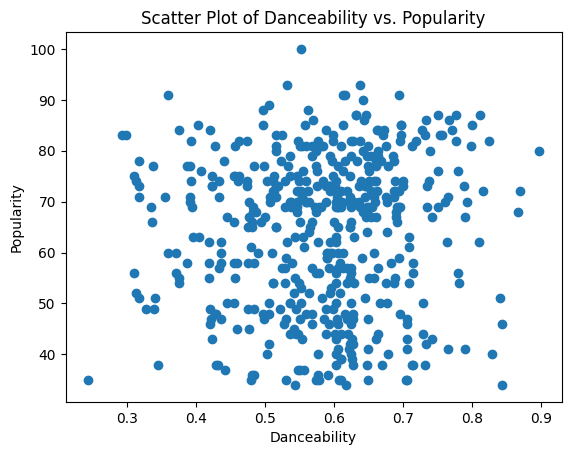

In [ ]:
correlation = df['danceability'].corr(df['popularity'])
print(f"Correlation between danceability and popularity: {correlation}")

plt.scatter(df['danceability'], df['popularity'])
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Danceability vs. Popularity')
plt.show()

A correlation coefficient of approximately 0.0565 is very close to 0. This suggests that there is almost no linear relationship between "danceability" and "popularity." In other words, the danceability of a song does not have a significant linear impact on its popularity.